In [1]:
!pip install panadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\COVID19_state.csv")
print(df)

                   State    Tested  Infected  Deaths  Population  Pop Density  \
0                 Alaska    620170     17057      84      734002       1.2863   
1                Alabama   1356420    194892    2973     4908621      96.9221   
2               Arkansas   1363429    113641    1985     3038999      58.4030   
3                Arizona   1792602    248139    5982     7378494      64.9550   
4             California  18912501    930628   17672    39937489     256.3727   
5               Colorado   2034795    109910    2105     5845526      56.4011   
6            Connecticut   2367994     73858    4627     3563077     735.8689   
7   District of Columbia    528174     17438     647      720687   11814.5410   
8               Delaware    565983     25311     710      982895     504.3073   
9                Florida  10126764    801371   17043    21992985     410.1256   
10               Georgia   3596700    362921    7999    10736059     186.6719   
11                Hawaii    

In [17]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
             Tested       Infected        Deaths    Population   Pop Density  \
count  5.100000e+01      51.000000     51.000000  5.100000e+01     51.000000   
mean   2.904946e+06  179626.666667   4357.745098  6.496451e+06    431.560508   
std    3.590449e+06  208077.881595   5637.548491  7.450657e+06   1647.225920   
min    1.340180e+05    2219.000000     58.000000  5.670250e+05      1.286300   
25%    8.216280e+05   46623.500000    650.500000  1.802113e+06     50.604850   
50%    1.792602e+06  120865.000000   2113.000000  4.499692e+06    108.049700   
75%    3.403572e+06  208161.000000   4983.500000  7.587794e+06    223.983100   
max    1.891250e+07  930628.000000  25838.000000  3.993749e+07  11814.541000   

            Gini     ICU Beds        Income            GDP  Unemployment  ...  \
count  51.000000    51.000000     51.000000      51.000000     51.000000  ...   
mean    0.466165  1466.411765  51597.607843   61497.333333      3.515686  ...   
std     0.02

In [19]:
# Correlation matrix for selected columns
selected_columns = ['Tested', 'Infected', 'Deaths', 'Population', 'Pop Density', 'Income', 'Unemployment', 'ICU Beds', 'Physicians']
correlation_matrix = df[selected_columns].corr()

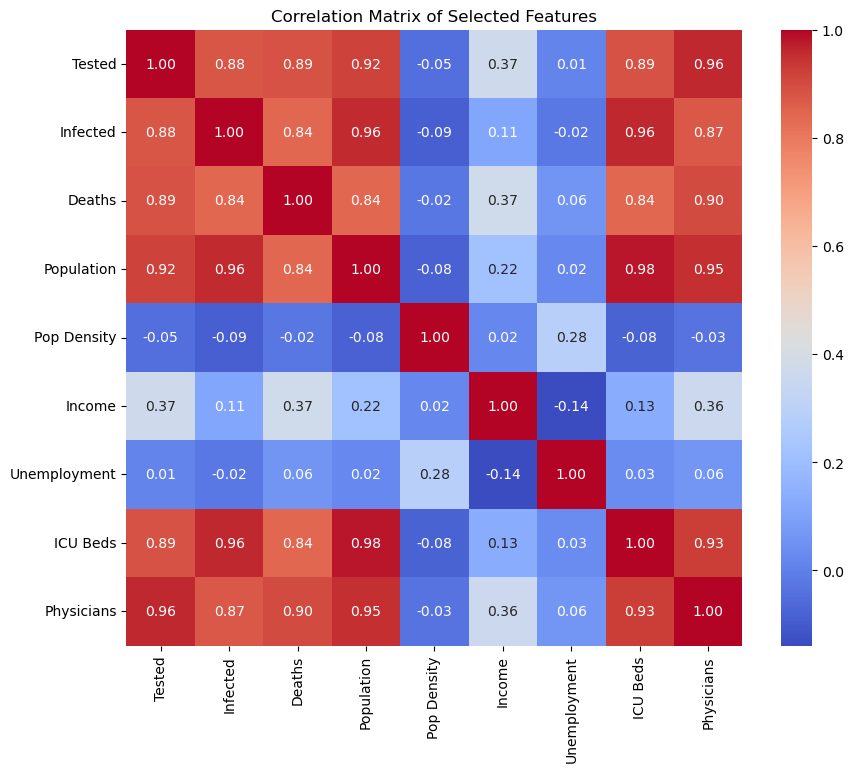

In [21]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()

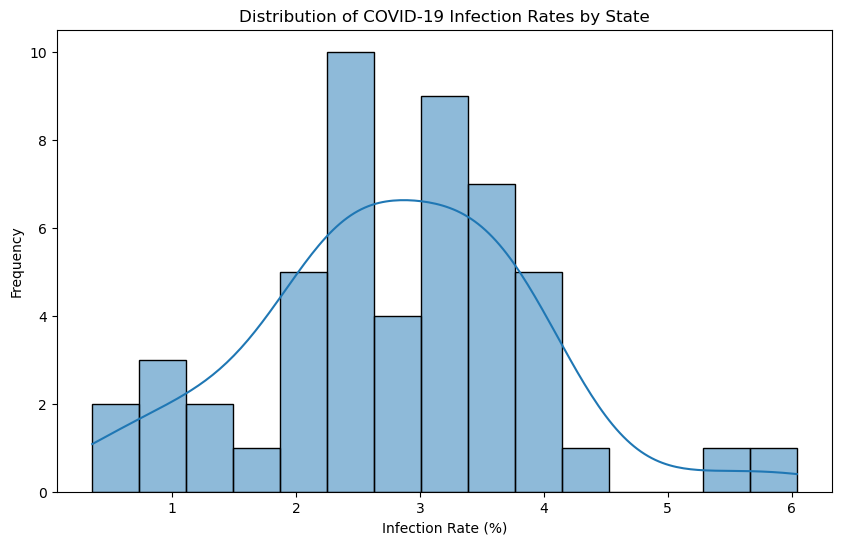

In [35]:

# Check the distribution of infection rates across states
df['Infection Rate'] = df['Infected'] / df['Population'] * 100
plt.figure(figsize=(10, 6))
sns.histplot(df['Infection Rate'], kde=True, bins=15)
plt.title('Distribution of COVID-19 Infection Rates by State')
plt.xlabel('Infection Rate (%)')
plt.ylabel('Frequency')
plt.show()

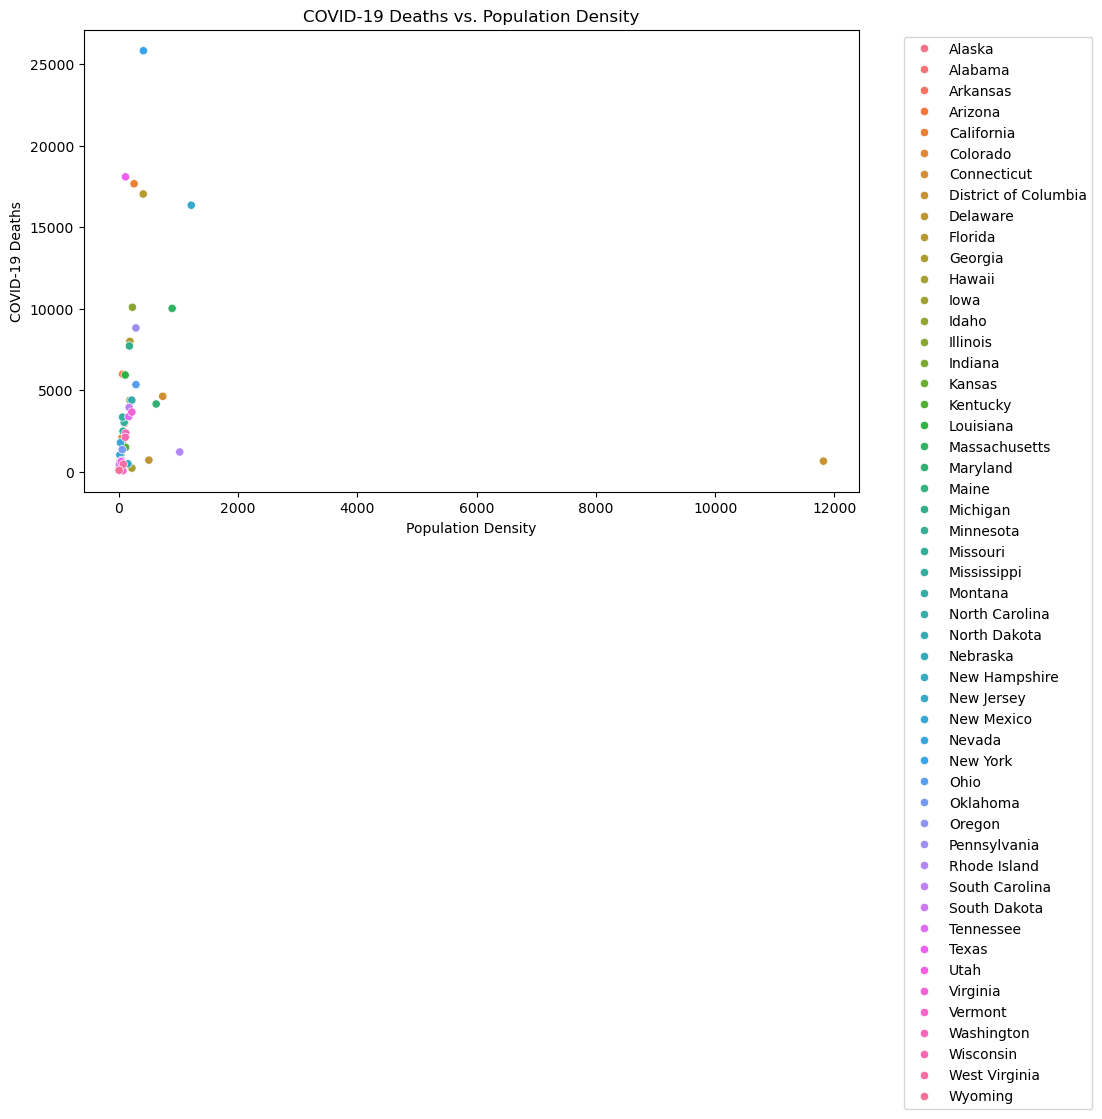

In [51]:
# Visualize COVID-19 Deaths vs. Population Density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pop Density', y='Deaths', hue='State')
plt.title('COVID-19 Deaths vs. Population Density')
plt.xlabel('Population Density')
plt.ylabel('COVID-19 Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

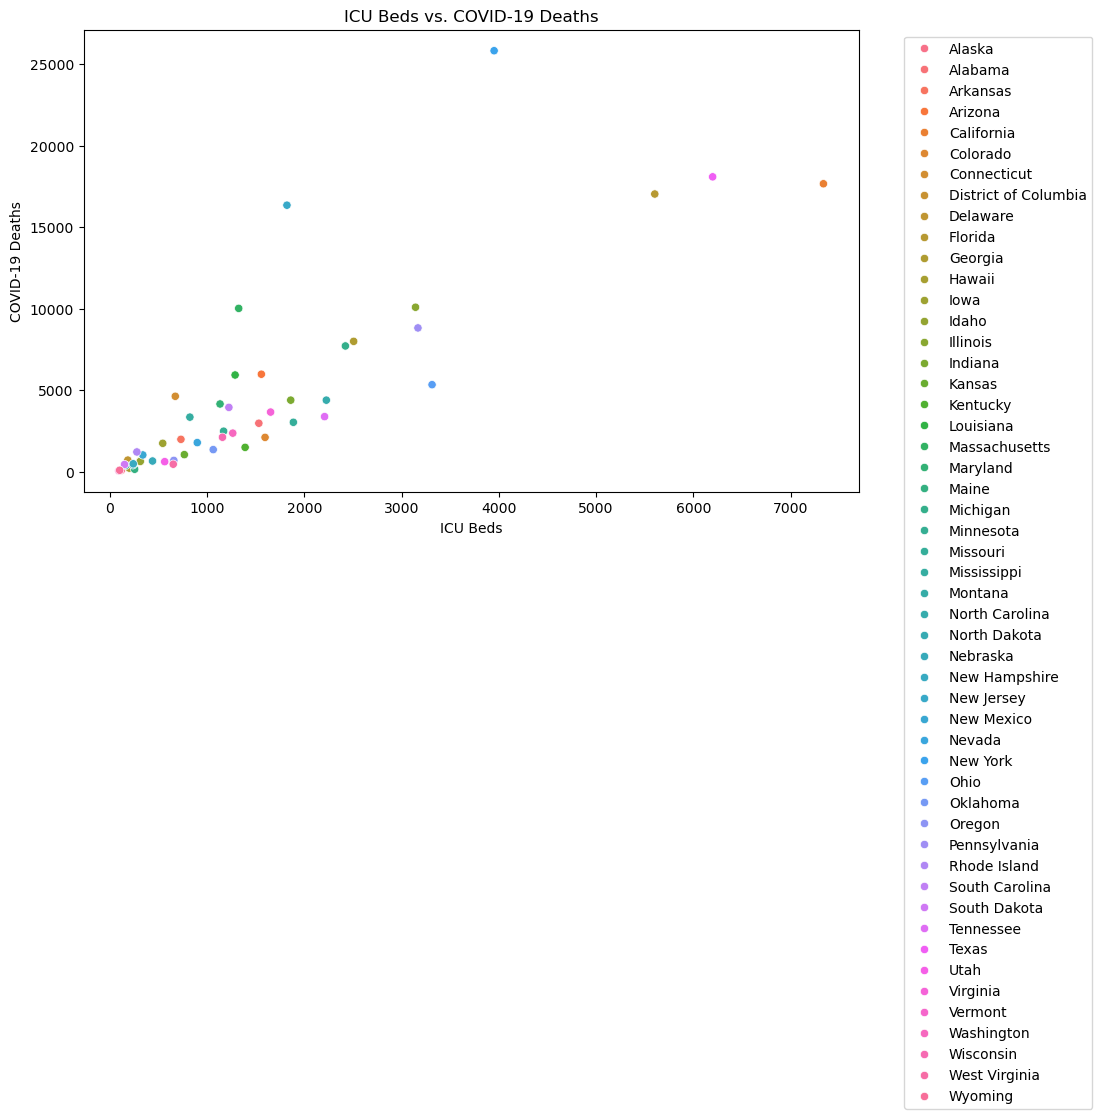

In [53]:
# Visualize ICU Beds vs. Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ICU Beds', y='Deaths', hue='State')
plt.title('ICU Beds vs. COVID-19 Deaths')
plt.xlabel('ICU Beds')
plt.ylabel('COVID-19 Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [60]:
# Ensure column names are cleaned
df.columns = df.columns.str.strip()

# Calculate Deaths and ICU Beds as a percentage of Population
df['Deaths_Percentage'] = (df['Deaths'] / df['Population']) * 100
df['ICU_Beds_Percentage'] = (df['ICU Beds'] / df['Population']) * 100

# Display the first few rows with the new percentage columns
print(df[['State', 'Deaths', 'Population', 'Deaths_Percentage', 'ICU Beds', 'ICU_Beds_Percentage']].head())


        State  Deaths  Population  Deaths_Percentage  ICU Beds  \
0      Alaska      84      734002           0.011444       119   
1     Alabama    2973     4908621           0.060567      1533   
2    Arkansas    1985     3038999           0.065318       732   
3     Arizona    5982     7378494           0.081073      1559   
4  California   17672    39937489           0.044249      7338   

   ICU_Beds_Percentage  
0             0.016212  
1             0.031231  
2             0.024087  
3             0.021129  
4             0.018374  
